# Numerical tests in python


In this notebook we discuss a bit the basics of numerical methods and plotting in python. [python](https://www.python.org/) as the standard language. A nice tutorial is this a [A byte of Python](https://python.swaroopch.com/).  Importantly, we will not reinvent the wheel, but use some standard libraries for scientific programming. They will be:

- The [jupyter notebook](https://jupyter.org/), for simple interactive coding.
- [Numpy](https://numpy.org/) for all kinds of numerical methods.
- [Matplotlib](https://matplotlib.org/) for all kind of plotting 

# Quantum harmonical oscillator

We will work our way through quantum harmonic oscillator for which the potential is:
$$
V(x) = \frac{m\omega^2}{2}x^2
$$    

We would now like to plot it up. For that we will need to import some routines, which simplify this.

In [8]:
# import plotting and numerics
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

now let us plot the potential

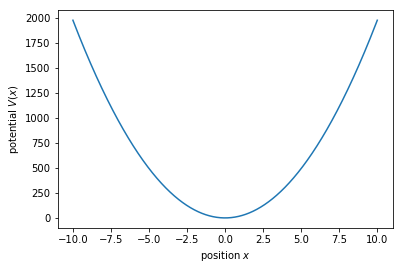

In [9]:
#parameters of the harmonic potential

omega = 2*np.pi; m = 1;hbar = 1

# parameters of the grid
Ngrid = 1001; xmin = -10; xmax = 10;

xvec = np.linspace(xmin,xmax,Ngrid);#a vector spanning from -10 to 10 with 100 grid points
Vx = m*omega**2/2*xvec**2;

f, ax = plt.subplots()
ax.plot(xvec,Vx);
ax.set_xlabel('position $x$');
ax.set_ylabel('potential $V(x)$');

# Numerical diagonalization

While the potential is nice to look at, we would actually like to use python to do some more powerful stuff than simple plots. One of them is the numerical diagonialization of the problem.

## Kinetic energy
So we first have to build the matrix that represents the kinetic energy. For that to work we discretize the second order derivative as:
$$
f''(x) = \frac{f(x-dx)+f(x+dx)-2f(x)}{dx^2}
$$

In [10]:
#resolution of the grid
dx = np.diff(xvec).mean()


dia = -2*np.ones(Ngrid)
offdia = np.ones(Ngrid-1)
d2grid = np.mat(np.diag(dia,0) + np.diag(offdia,-1) + np.diag(offdia,1))/dx**2
#avoid strange things at the edge of the grid
d2grid[0,:]=0
d2grid[Ngrid-1,:]=0

Ekin = -hbar**2/(2*m)*d2grid
Ekin

matrix([[    0.,     0.,     0., ...,     0.,     0.,     0.],
        [-1250.,  2500., -1250., ...,     0.,     0.,     0.],
        [    0., -1250.,  2500., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,  2500., -1250.,     0.],
        [    0.,     0.,     0., ..., -1250.,  2500., -1250.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]])

## Potential energy

This one is just a diagonal matrix that we have to initialize properly.

In [11]:
#potential energy as matrix
Epot = np.mat(np.diag(Vx,0))
Epot

matrix([[1973.92088022,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        , 1966.03309238,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        , 1958.16109591, ...,    0.        ,
            0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        , ..., 1958.16109591,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
         1966.03309238,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        , 1973.92088022]])

# Diagonalization

We can now put them together as:

In [12]:
#%% combine to Hamiltonian, diagonalize and plot the lowest 30 energy eigenvalues
H =  Ekin + Epot

# diagonalization
w, v = LA.eig(H)
# sort it such that things look nice later
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]

Time to plot up the eigenvalues.

Text(0.5, 0, 'index $n$')

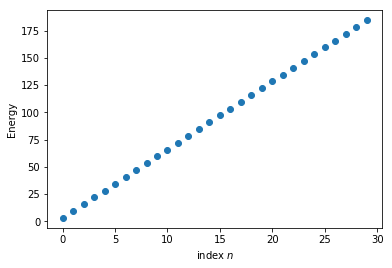

In [13]:
f, ax = plt.subplots()
ax.plot(EigVals[0:30],'o')
ax.set_ylabel('Energy')
ax.set_xlabel('index $n$')

and now some eigenfunctions

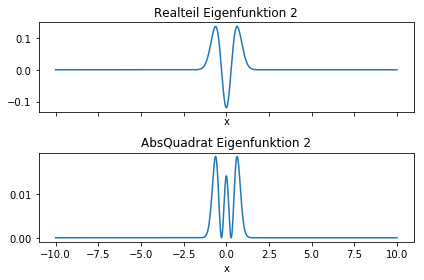

In [14]:
n=2
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(xvec,np.real(EigVecs[:,n]))
ax1.set(title='Realteil Eigenfunktion %d'%(n),xlabel='x')
ax2.plot(xvec,np.power(np.abs(EigVecs[:,n]),2))
ax2.set(title='AbsQuadrat Eigenfunktion %d'%(n),xlabel='x')
fig.tight_layout()

Feel free to extend this further as you wish at some later stage.